## 构建BA无标度网络

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

BA无标度网络的机制主要是两点：
1. 增长：节点数会随着时间增加，每次新增一个节点
2. 优先连接：新节点和老节点之间存在边相连的概率与老节点的度成正相关：$\Pi_i=\frac{k_i}{\sum_jk_j}$



In [23]:
m0=3
Graph=nx.erdos_renyi_graph(m0,1)

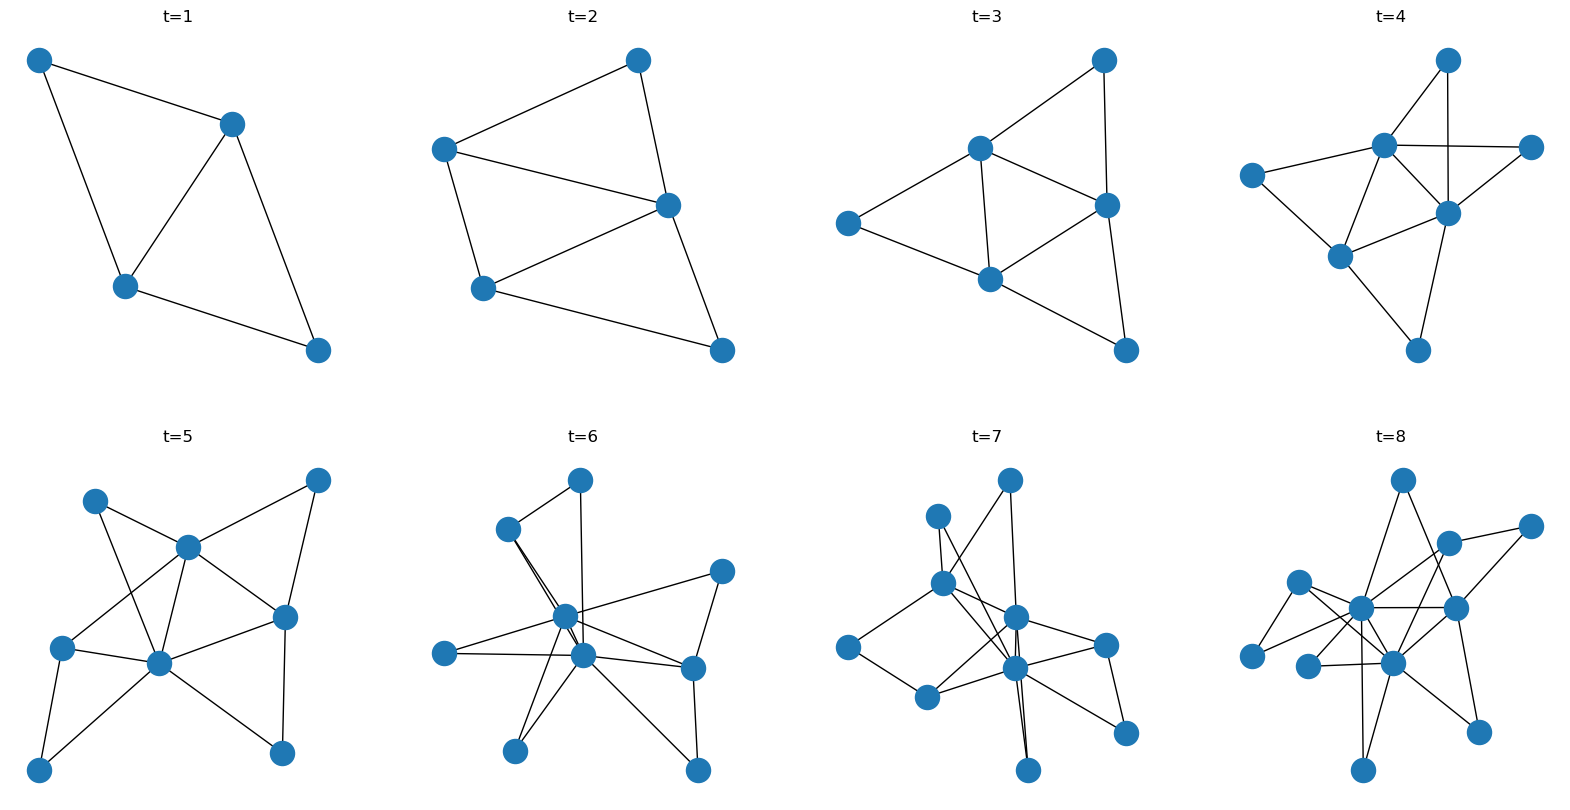

In [24]:
t=1
fig,ax=plt.subplots(2,4,figsize=(20,10))
while(t<1000):
    sum_degree=2*Graph.number_of_edges()
    size=Graph.number_of_nodes()
    prob=[]
    for i in range(size):
        prob.append(Graph.degree[i]/sum_degree)
    #print(prob)
    new_node=Graph.number_of_nodes()
    Graph.add_node(new_node)
    count=0
    while(count<2):
        for i in range(new_node):
            if(np.random.rand()<prob[i]):
                if(Graph.has_edge(i,new_node)):
                    continue
                Graph.add_edge(i,new_node)
                count=count+1
                if(count==2):
                    break
    if(t<9):
        ax[int((t-1)/4),(t-1)%4].set_title("t="+str(t))
        nx.draw(Graph,ax=ax[int((t-1)/4),(t-1)%4])
    t=t+1
plt.show()

In [14]:
def getDegreeDist(Graph):
    all_degree=[Graph.degree[i] for i in range(Graph.number_of_nodes())]
    degree=list(set(all_degree))
    N=len(Graph.nodes())

    pk=[]
    for ki in sorted(degree):
        pk.append(all_degree.count(ki)/N)

    return sorted(degree),pk

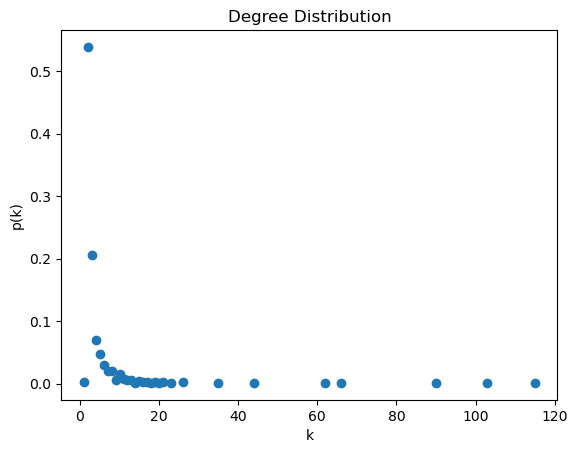

In [15]:
k,pk=getDegreeDist(Graph)
plt.scatter(k,pk)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Degree Distribution')
plt.show()


上面的图不是很明显，考虑使用双对数坐标系，如果满足幂律分布，即：$P(k)\sim k^{-\gamma}$
在对数坐标系下：$\lg P(k)=-\gamma \lg k$，呈现线性关系

In [16]:
def BAnetwork(m0,m,n):
    t=1
    Graph=nx.erdos_renyi_graph(m0,1)
    while(t<n):
        sum_degree=2*Graph.number_of_edges()
        size=Graph.number_of_nodes()
        prob=[]
        for i in range(size):
            if(sum_degree==0):
                prob.append(1)
                break
            prob.append(Graph.degree[i]/sum_degree)
        #print(prob)
        new_node=Graph.number_of_nodes()
        Graph.add_node(new_node)
        count=0
        while(count<m):
            for i in range(new_node):
                if(np.random.rand()<prob[i]):
                    if(Graph.has_edge(i,new_node)):
                        continue
                    Graph.add_edge(i,new_node)
                    count=count+1
                    if(count==m):
                        break
        t=t+1
    return Graph

In [17]:
Graph1=BAnetwork(1,1,1000)
Graph2=BAnetwork(3,3,1000)
Graph3=BAnetwork(5,5,1000)
Graph4=BAnetwork(7,7,1000)
k1,pk1=getDegreeDist(Graph1)
k2,pk2=getDegreeDist(Graph2)
k3,pk3=getDegreeDist(Graph3)
k4,pk4=getDegreeDist(Graph4)


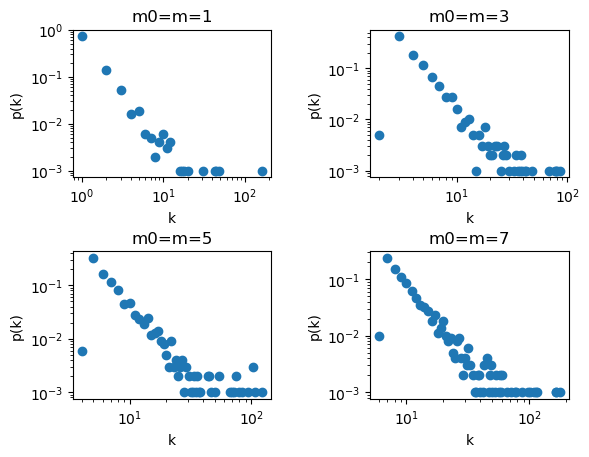

In [18]:
plt.subplot(221)
plt.scatter(k1,pk1)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('m0=m=1')
plt.xscale('log')
plt.yscale('log')
plt.subplot(222)
plt.scatter(k2,pk2)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('m0=m=3')
plt.xscale('log')
plt.yscale('log')
plt.subplot(223)
plt.scatter(k3,pk3)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('m0=m=5')
plt.xscale('log')
plt.yscale('log')
plt.subplot(224)
plt.scatter(k4,pk4)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('m0=m=7')
plt.xscale('log')
plt.yscale('log')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

考虑其他的实现方法，不去计算概率，把节点的概率对应到数组中出现的次数，然后随机取得一个节点

初始状态是m个节点的空图

In [26]:
def BAnetwork(n,m):
    initG=nx.empty_graph(m)
    targets=range(m)
    repeated_nodes=[]
    ## 将现有节点按正比于其度的次数加入到一个数组中，初始化时的m个节点度均为0，所以数组为空
    source=m
    while(source<n):
        initG.add_edges_from(zip([source]*m,targets))
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source]*m)
        targets=set()
        while(len(targets)<m):
            x=np.random.choice(repeated_nodes)
            targets.add(x)
        source+=1
    return initG

进行测试，构造网络并画出对应的度分布

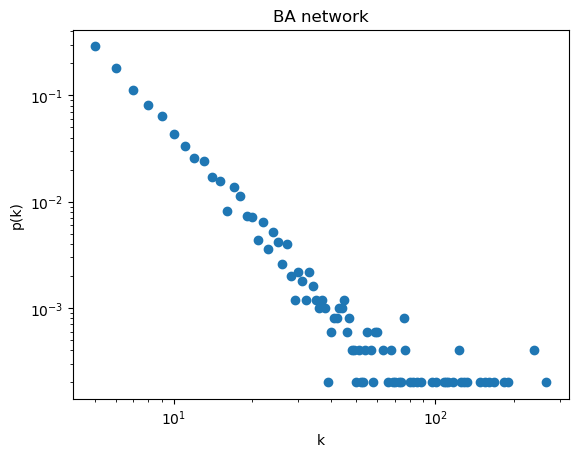

In [31]:
BAGraph1=BAnetwork(5000,5)
k1,pk1=getDegreeDist(BAGraph1)
plt.scatter(k1,pk1)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.xscale('log')
plt.yscale('log')
plt.title('BA network')
plt.show()

防止过度聚集，引入一个p，归一化？

$\Pi_i=p\frac{k_i}{\sum_jk_j}+(1-p)\frac{1}{N}$